(sec_bisection)=
# Bisection Method


In this section, a simple but robust root-finding algorithm called the bisection method. This method reuires a initial bracket.  Thus, the first step is to _bracket_ the target root $x^*$ between $x_L$ and $x_U$ such that $x_L < x^* < x_U$.  It is important that there is only one root between $x_L$ and $x_U$.  It turns out that this is not an trivial task for computer. Human eyes can find the bracket easily by plotting the function.  Therefore, the best practice is to plot the function and bracket the target root by visual inspection.  However, in some cases it is desirable to have a robust numerical method to find the bracket. For example,  when root finding is required many times during long computer simulation, you can't stop the simulation to visually inspect the bracket.   There are simple algorithms of finding the bracket but unfortunately no method guarantees the outcome.   In this chapter, we assume that the bracket is done by direct visual inspection.

Any iterative method needs a criteria to stop the iteration. Ultimately, we stop it when the error is smaller than the tolerance.  However, in practice we never know the exact error.  If we knew it, we have the exact root! Therefore, we must carefully choose an ending criteria.


## Bracketing a root

Pick two different points, $x_1$ and $x_2$.  If $f(x_1) f(x_2) < 0$, there must be at least one root between $x$1 and $x_2$.  It does not say that there is only one.  There may be any odd number of roots.  On the other hand, if $f(x_1) f(x_2) > 0$, then either no root or even number of roots between $x_1$ and $x_2$.  If $x_1 - x_2$ is small enough, we hope that there is only one root for the former case and no root in the latter case. But this is just a home and no guarantee.  Let use choose thet two point not far from each other such that $x_2 > x_1$ and $f(x_1) f(x_2) > 0$.  Assuming there is not root between the two points, we gradually reduce $x_1$ or increase $x_2$ until $f(x_1) f(x_2)$ change the sign.  At the end, $x_1$ and $x_2$ are the bracket.

**Example**  Bracket all positive roots of $x^3 - 9 x^2 +23 x - 15$.

In [1]:
import numpy as np


def f(x):
    return x**3-9*x**2+23*x-15

# search root between xmax and 0
xmax=10.0

# initial step size
dx = 0.1

# create empty array
xL=[]
xU=[]
    
# initial two points
x1 = 0.0
x2 = x1+dx

while x2< xmax:
    
    if f(x1)*f(x2)>0:
        # no root yet
        # expand the upper bound
        x3 = x2+ 1.6 *(x2-x1)
        x1 = x2
        x2 = x3
        
    else:
        # found a bracket
        xL.append(x1)
        xU.append(x2)
        print("found a bracket. [{0:8.5e}, {1:8.5e}]".format(x1,x2))

        # reset the two points for next bracket
        x1 = x2
        x2 = x1+dx

print("reached xmax")

found a bracket. [9.25600e-01, 1.58096e+00]
found a bracket. [2.50656e+00, 3.16192e+00]
found a bracket. [4.74288e+00, 5.79146e+00]
reached xmax


Noting that $x^3 - 9 x^2 +23 x - 15 = (x-1)(x-3)(x-5)$,  there are three positive roots.  The above code successfully fond the three brackets.  You can also find the brackets easily by plotting the function.  In the following plotting, the black dots are the roots and the vertical red lines bracket the roots.

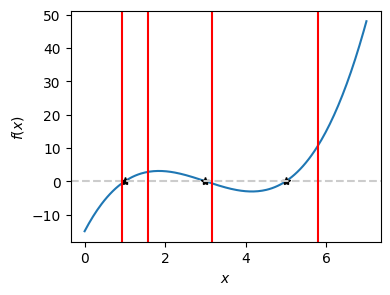

In [2]:
# continued from the previous code cell

import matplotlib.pyplot as plt

x=np.linspace(0,7,201)
y=f(x)

plt.figure(figsize=(4,3))
plt.plot(x,y)
plt.plot([1,3,5],[0,0,0],'*k')
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.axhline(y = 0, color = '0.8', linestyle = '--')
plt.axvline(x = xL[0], color='r', linestyle = '-')
for k in range(3):
    plt.axvline(x = xU[k], color='r', linestyle = '-')

## Bisection Method

Starting with an initial bracket, the bracket is narrowed by a half. Repeating this procedure until the bracket becomes so narrow that the the lower and upper limits of the bracket is almost identical.  Then, its midpoint is the root with a desired accuracy. Consider  a n initial bracket $[x_L,x_U]$. The mid point $x_M}$ between  $x_L$ and $x_U$ divide the bracket into two smaller intervals $[x_L,x_M]$ and $[x_M,x_U]$.  One of the interval brackets the root.  If $f(x_L) f(x_M) < 0$, the root must be between $x_L}$ and $x_M$.  Now we have a new bracket $[x_L,x_M]$.  Otherwise, the root must be between $x_M$ and $x_U$, which is the new bracket.  Repeating this procedure, the root is isolated in a small region. Noting that the error cannot be bigger than $x_U-x_L$ and thus the iteration is terminated when $x_U-x_L < \text{tolerence}$. This is the method of bisection.  Figure {numref}`fig_bisection` demonstrates how the bisection method works.  The procedure of this iterative method is  as follows.

```{figure} bisection.png
---
height: 300px
name: fig_bisection
---
Bisection method. Starting with an initial bracket $(x_0, x_1)$, the bracket is halved at each iteration to $(x_2,x_1)$, $(x_2,x_3)$, $(x_2, x_4)$, $(x_5, x_4)$, $\cdots$.  Notice that $x_5$ is already quite close to the root.
```

```{admonition} Algorithm: Bisection Method

1. Get a initial bracket $x_L$ and $x_U$ and a tolerance $\epsilon$.
2. Make it sure that $f(x_L) f(x_U) <0$.  Otherwise, stop and check the initial bracket.
3. Evaluate the function at the mid point $x_M = \frac{1}{2}(x_L+x_U)$.
4. If $x_U - x_L< \epsilon$, $x_M$ is the root and stop here.  Otherwise continue.
5. If $f(x_L) f(x_M) < 0$, then the root is between $x_L$ and $x_M$.  Let $x_U=x_M$ and go to step 3.  Otherwise continue.
6. The root must be between $x_M$ and $x_U$.  Let $x_L=x_M$ and go to Step 3.

```

In [3]:
# continued from the previous code cell
# a bracket obtained in the previous code cell is used here

# set a tolerance
tol=1.e-5
   
# initial bracket
x1=xL[1]
x2=xU[1]
f1 = f(x1)
f2 = f(x2)

# iteration counter
n=0

# mid point
xm = (x1+x2)/2.0
fm = f(xm)

while x2-x1 > tol:
    if f1*fm < 0:  # root in the lower half
        x2=xm
        f2=fm
    else:          # root in the upper half
        x1=xm
        f1=fm

    xm = (x1+x2)/2.0      # new mid point
    fm = f(xm)
    n+=1

print("Answer = {0:7.5f}, (iteration = {1:3d})".format(xm,n))

Answer = 3.00064, (iteration =  17)
